In [36]:
from tensorboard.backend.event_processing import event_accumulator
import glob

def get_metric(path : str, metric : str) -> list[float]:
    files = glob.glob(path)
    ea = event_accumulator.EventAccumulator(files[0])
    ea.Reload()
    val_acc = ea.Scalars(metric)
    return [x.value for x in val_acc]

In [37]:
sgd_files = [
    rf"../lightning_logs/sgd_dropout_0{i}/version_0/events.out.tfevents.*"
    for i in range(10)
]

from tqdm import tqdm
sgd_accs = [get_metric(f, 'val_accuracy') for f in tqdm(sgd_files)]
max_sgd_accs = [max(acc) for acc in sgd_accs]

adamw_files = [
    rf"../lightning_logs/adamw_dropout_0{i}/version_0/events.out.tfevents.*"
    for i in range(10)
]

adamw_accs = [get_metric(f, 'val_accuracy') for f in tqdm(adamw_files)]
max_adamw_accs = [max(acc) for acc in adamw_accs]

100%|██████████| 10/10 [00:25<00:00,  2.58s/it]


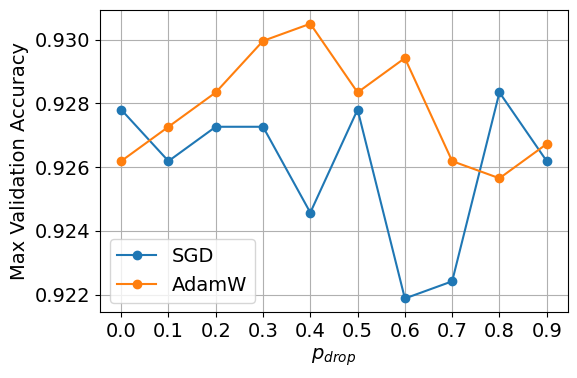

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(range(10), max_sgd_accs, marker='o', label="SGD")
plt.plot(range(10), max_adamw_accs, marker='o', label="AdamW")
plt.xticks(range(10), [f"{i*0.1:.1f}" for i in range(10)])
plt.xlabel("$p_{drop}$")
plt.ylabel("Max Validation Accuracy")
plt.grid()
plt.tight_layout()
# increase font size
plt.rcParams.update({'font.size': 14})
plt.legend()
plt.savefig("experiment.png", dpi=300, bbox_inches='tight')

In [39]:
adamw_bce = get_metric(adamw_files[6], 'val_loss')
sgd_bce = get_metric(sgd_files[6], 'val_loss')

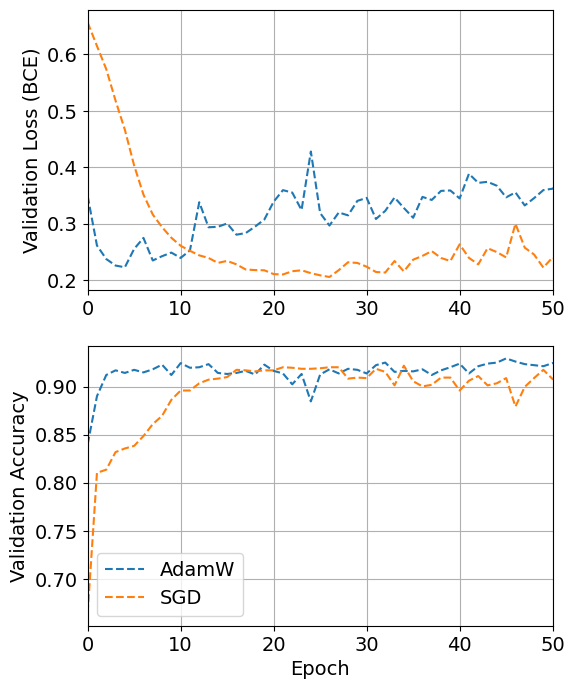

In [56]:
fig, axs = plt.subplots(2, 1, figsize=(6,8))
axs : list[plt.Axes]
axs[0].plot(adamw_bce, label="AdamW", linestyle='--')
axs[0].plot(sgd_bce, label="SGD", linestyle='--')
axs[0].set_xlim(0, 50)
axs[0].set_ylabel("Validation Loss (BCE)")
axs[0].grid()

axs[1].plot(adamw_accs[6], label="AdamW", linestyle='--')
axs[1].plot(sgd_accs[6], label="SGD", linestyle='--')
axs[1].set_xlim(0, 50)
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Validation Accuracy")
axs[1].grid()
axs[1].legend()

plt.savefig("loss_and_accuracy.png", dpi=300, bbox_inches='tight')